<a href="https://colab.research.google.com/github/AliKhedr2/ISEF/blob/main/Copy_of_ISEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

Saved to photo.jpg


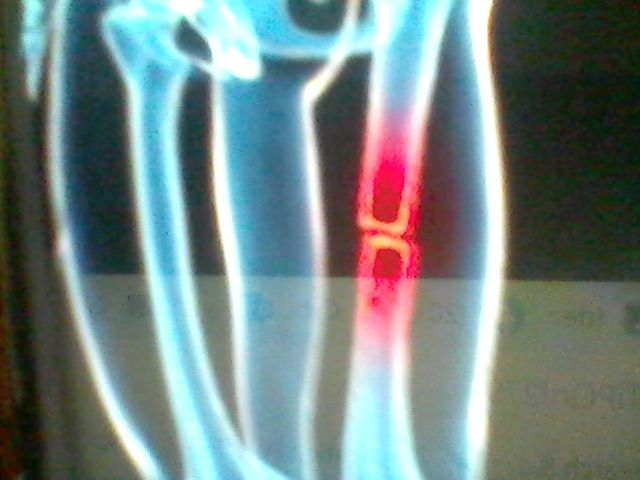

photo.jpg


[[[46 60 63]
  [50 69 70]
  [51 72 72]
  ...
  [ 4 24 18]
  [ 1 23 17]
  [ 3 26 20]]

 [[41 58 59]
  [43 64 63]
  [45 68 64]
  ...
  [ 6 23 27]
  [ 2 20 26]
  [ 4 22 29]]

 [[36 59 55]
  [39 62 58]
  [43 70 62]
  ...
  [ 7 21 33]
  [ 7 20 36]
  [ 4 16 34]]

 ...

 [[ 0 10 29]
  [ 3 14 37]
  [ 3 14 43]
  ...
  [74 93 91]
  [74 92 85]
  [74 94 82]]

 [[ 1 13 22]
  [ 4 17 32]
  [ 3 17 38]
  ...
  [77 93 92]
  [77 95 88]
  [77 94 83]]

 [[ 3 17 15]
  [ 5 20 26]
  [ 3 19 33]
  ...
  [78 94 92]
  [77 95 88]
  [73 90 79]]]
1/1 [==============================] - 1s 828ms/step
Broken


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

  #--------------- ------------------- --------------------#


import tensorflow
import numpy as np
import cv2


import cv2 
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
  print(filename)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

np.set_printoptions(suppress=True)


model = tensorflow.keras.models.load_model('AA.h5')

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


cam = cv2.VideoCapture(1)
text = ""

img = cv2.imread(filename)
img = cv2.resize(img,(224, 224))
image_array = np.asarray(img)
print(image_array)

normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

data[0] = normalized_image_array

prediction = model.predict(data)

for i in prediction:
    if i[0] > 0.7:
        text ="Broken"
    if i[1] > 0.7:
        text ="Normal"
    if i[2] > 0.7:
        text = "Not X-ray"
    
    print(text
          )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')